## Introduction to Bayesian Statistics Lab

### Names: (Your name here)

### Import Statements

In [2]:
# begin by importing necessary modules
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity 
from scipy.stats import gaussian_kde
from astropy import units as u

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# import a real dataset, one containing the properties of exoplanets discovered by the TESS satelite

TESS = pd.read_csv('TESS_planets.csv', skiprows=80)
KEPL = pd.read_csv('Kepler_planets.csv', skiprows=54)

### Background

According to wikipedia, "the Kepler telescope is a retired space telescope launched by NASA to discover Earth-size planets orbiting other stars... After nine years of operation, the telescope's reaction control system fuel was depleted, and NASA announced its retirement on October 30, 2018." The telescope helped astronomers and a community of scientists confirm over 2000 planet detections. You can read about the Kepler mission [here](https://www.nasa.gov/mission_pages/kepler/overview/index.html)

Kepler's spiritual successor, TESS, is the "Transiting Exoplanet Survey Satellite... a space telescope... designed to search for exoplanets using the transit method in an area 400 times larger than that covered by the Kepler mission." Data from TESS is still being beamed down to Earth, but a large number of exoplanets have already been confirmed using TESS. You can read more about the TESS mission [here](https://www.nasa.gov/content/about-tess)
    
Both Kepler and TESS discover planets using the transit method: they measure how the light from a star dims as a planet orbiting that star passes in front of it (transits). Bigger planets closer to their host stars will therefore be easier to detect; the survey is biased towards these detections. We might expect, then, that the data we collect from Kepler or TESS might not be representative of the total exoplanet population.

### Exercise 1

<div class="hw">
    Read through the Kepler mission overview (linked above) and comment one additional bias that might exist in the Kepler dataset </div>

**Answer:**

### Exercise 2

<div class="hw">
    Let's use bayesian statistics to see how our understanding of the properties of the exoplanet population has changed, using Kepler data as an informed prior and TESS data as our new observations. First, pick one of the following four qualities of an exoplanet: radius, orbital semi-major axis (distance between it and the star), orbital period (how long it takes to orbit the star), or temperature. Check the units for each of your choice of parameter in both datasets. Comment which parameter you chose, and what units it has in both datasets.</div>

**Answer:**


### Exercise 3: the prior

<div class="sidebar">
A prior is a continuous distribution, but we have a set of discrete data points. What we'll need to do next is construct a prior for our chosen parameter using our Kepler data. Luckily, you learned to do this in Prelab 9. Set a variable we'll call "prior_data" equal to an array containing our data, and then construct a continuous distribution modeled on your data using a KDE.

In [3]:
# assign your exoplanet property Kepler data to a variable here
prior_data = KEPL.koi_teq
prior_data = prior_data.dropna().to_numpy()

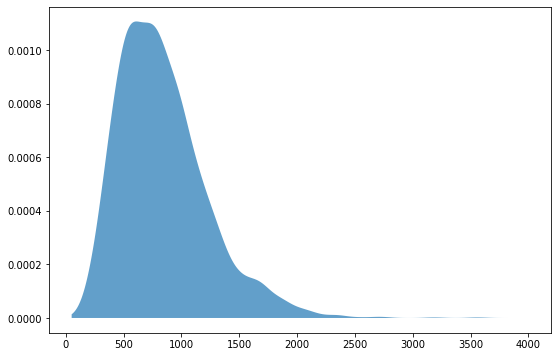

In [4]:
# create a PDF using a KDE here, and plot it
x = np.arange(50,4000)

prior = gaussian_kde(prior_data)

prior_pdf = prior.pdf(x)

plt.figure(figsize=(9,6))
plt.fill_between(x, prior_pdf, alpha=0.7) 

### Exercise 4: the likelihood

Now we have a PDF (probability density function), for our prior. We know that our posterior will be proportional to our prior multiplied by our data. Now, let's construct a PDF for our data.

<div class="hw">
(a) Like you did for your prior data, assign the variable "data" to the TESS data for your given parameter. Make sure you transform the units of this data into the same units as the prior. Then, create a PDF for this data using a KDE, and check that the resulting distribution looks correct.

In [5]:
# assign your exoplanet property TESS data a variable here
data = TESS.pl_eqt
data = data.dropna().to_numpy()

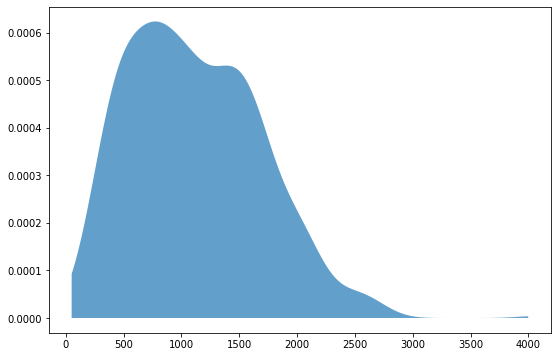

In [6]:
# create a PDF using a KDE here, and plot it
data_model = gaussian_kde(data)

likelihood = data_model.pdf(x)

plt.figure(figsize=(9,6))
plt.fill_between(x, likelihood, alpha=0.7) 

<div class="hw">
(b) Describe what is qualitatively different about your TESS data and the prior Kepler data. Why might the distribution have changed between the two series of observations? </div>
    
**Answer:**

### Exercise 5: the posterior

Now, your task is to construct a posterior distribution that is the product of your prior and your observation.

<div class="hw">
(a) Using the cell below, multiply the likelihood by the prior to produce a posterior. Then, normalize all three pdfs so that they can be plotted on the same axis.

In [8]:
# construct your posterior and normalize your pdfs here
prior_pdf_norm = prior_pdf/sum(prior_pdf)

likelihood_norm = likelihood/sum(likelihood)

posterior = likelihood*prior_pdf
post_norm = posterior/sum(posterior)

<div class="hw">
(b) Plot your posterior individually and then on the same axis as your prior and likelihood.

Text(0, 0.5, 'Normalized Likelihood')

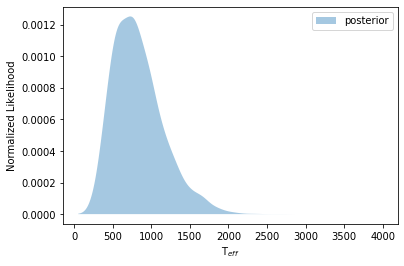

In [11]:
# individual plot here
plt.fill_between(x, post_norm, alpha = 0.4, label='posterior')
plt.legend()
plt.xlabel('T$_{eff}$')
plt.ylabel('Normalized Likelihood')

Text(0, 0.5, 'Normalized Likelihood')

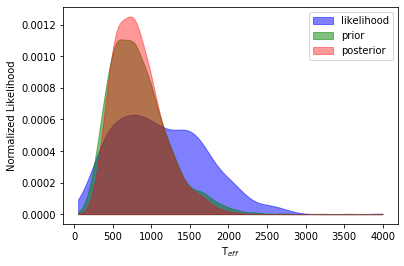

In [10]:
# all three plotted here
plt.fill_between(x, likelihood_norm, alpha=0.5, color='b', label='likelihood')
plt.fill_between(x, prior_pdf_norm, alpha=0.5, color='g', label='prior') 
plt.fill_between(x, post_norm, alpha = 0.4, color='r', label='posterior')
plt.legend()
plt.xlabel('T$_{eff}$')
plt.ylabel('Normalized Likelihood')

<div class="hw">
(c) Describe how TESS observations of your parameter have affected the posterior. Does the posterior more dramatically resemble the prior or the data? Why?

**Answer:**

### Exercise 6: Hypothesis testing

<div class="sidebar">
Remember that a hypothesis test in the Bayesian framework is as simple as comparing two likelihoods via a Bayes Factor. See (this table)[https://en.wikipedia.org/wiki/Bayes_factor#Interpretation] if you need a reminder how to interpret a Bayes factor

<div class="hw">
(a) Formulate a hypothesis to test on your posterior distribution. Write down this hypothesis here.
    
**Answer:**

<div class="hw">
(b) In the cell below, calculate the associated Bayes Factor.

In [17]:
# hypothesis test here
# Neptune (70K) is more likely than Mercury (700K)
h0 = posterior[70]
h1 = posterior[700]
print(h0/h1)

0.012956856308846996


<div class="hw">
(c) Evaluate the result of your hypothesis test. If it was inconclusive, reflect why. If it was decisive, explain what it says about your data.

**Answer:**